In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
base_ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
base_ordinal.shape

(2580, 83)

In [4]:
base_ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [5]:
X = base_ordinal.drop(['SalePrice'], axis=1).values
y = base_ordinal.SalePrice.values

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [8]:
no_bootstrap_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', bootstrap=False)
no_bootstrap_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False)

In [9]:
bootstrap_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', bootstrap=True)
bootstrap_model.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
print("R^2 on Train without bootstrapping:", no_bootstrap_model.score(X_train, y_train))
print("R^2 on Train with bootstrapping:", bootstrap_model.score(X_train, y_train))

R^2 on Train without bootstrapping: 1.0
R^2 on Train with bootstrapping: 0.9840265038200597


In [11]:
print("R^2 on Test without bootstrapping:", no_bootstrap_model.score(X_test, y_test))
print("R^2 on Test with bootstrapping:", bootstrap_model.score(X_test, y_test))

R^2 on Test without bootstrapping: 0.7661386437833758
R^2 on Test with bootstrapping: 0.8959731796536328


In [12]:
len(bootstrap_model.feature_importances_)

82

In [13]:
X_cols = base_ordinal.drop(['SalePrice'], axis=1).columns
len(X_cols)

82

In [14]:
from matplotlib import pyplot as plt
#plt.barh(X_cols, bootstrap_model.feature_importances_)

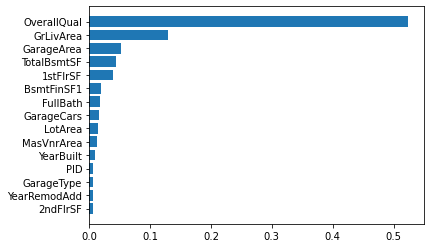

In [15]:
sorted_idx = bootstrap_model.feature_importances_.argsort()[67:82]
plt.barh(X_cols[sorted_idx], bootstrap_model.feature_importances_[sorted_idx]);

<BarContainer object of 15 artists>

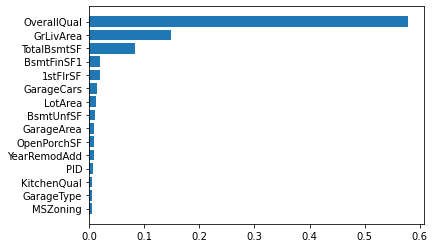

In [16]:
sorted_idx = no_bootstrap_model.feature_importances_.argsort()[67:82]
plt.barh(X_cols[sorted_idx], no_bootstrap_model.feature_importances_[sorted_idx])

In [17]:
predicted_value = bootstrap_model.predict(X_test)

In [18]:
true_value = y_test

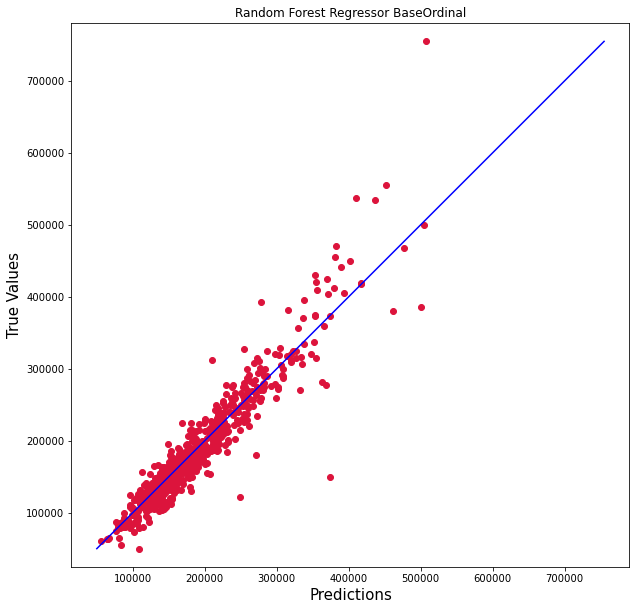

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')


plt.title('Random Forest Regressor BaseOrdinal')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()
